In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('data/churn.csv', index_col=0)
labels = df.churn
features = df.drop('churn', axis=1)
features.head()

,host_is_superhost,price,room_type,accommodates,review_scores_cleanliness,review_scores_location,host_identity_verified,host_response_time,host_response_rate,host_has_profile_pic,availability_365,calculated_host_listings_count,calendar_updated,minimum_nights,number_of_reviews,reviews_per_month,days_since_last_review
19444,f,200.0,Entire home/apt,3,10.0,10.0,f,a few days or more,0.0,f,243.0,1.0,4 months ago,7,4,0.0,850.0
1520,f,450.0,Entire home/apt,4,10.0,10.0,f,a few days or more,0.0,f,208.0,1.0,2 weeks ago,3,7,0.0,505.0
1517,f,28.0,Shared room,1,0.0,0.0,f,a few days or more,0.0,f,364.0,1.0,6 weeks ago,1,0,0.0,3650.0
21691,f,48.0,Private room,2,8.0,6.0,f,a few days or more,0.0,f,143.0,1.0,4 months ago,1,1,0.0,612.0
21706,f,160.0,Private room,2,0.0,0.0,f,a few days or more,0.0,f,365.0,1.0,2 months ago,1,0,0.0,3650.0


In [3]:
drop_columns = ['host_response_time', 
                'calendar_updated',
                'days_since_last_review']

In [4]:
features.drop(drop_columns, axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77201 entries, 19444 to 0
Data columns (total 14 columns):
host_is_superhost                 77201 non-null object
price                             77201 non-null float64
room_type                         77201 non-null object
accommodates                      77201 non-null int64
review_scores_cleanliness         77201 non-null float64
review_scores_location            77201 non-null float64
host_identity_verified            77201 non-null object
host_response_rate                77201 non-null float64
host_has_profile_pic              77201 non-null object
availability_365                  77201 non-null float64
calculated_host_listings_count    77201 non-null float64
minimum_nights                    77201 non-null int64
number_of_reviews                 77201 non-null int64
reviews_per_month                 77201 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 8.8+ MB


In [5]:
feature_matrix = pd.get_dummies(features.drop(drop_columns, axis=1)).as_matrix()
feature_matrix

/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[200.,   3.,  10., ...,   0.,   1.,   0.],
       [450.,   4.,  10., ...,   0.,   1.,   0.],
       [ 28.,   1.,   0., ...,   0.,   1.,   0.],
       ...,
       [200.,   3.,  10., ...,   1.,   0.,   1.],
       [235.,   2.,  10., ...,   0.,   0.,   1.],
       [ 49.,   5.,  10., ...,   1.,   0.,   1.]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.3)

In [7]:
# create model (estimator) object
model = LogisticRegression(penalty='l1')

# fit model to training data
model.fit(X_train, y_train)

# make predictions
predictions = model.predict(X_test)

# evaluate model
accuracy = (predictions == y_test).sum() / len(y_test)

model.score(X_test, y_test)

/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7204783903976513

In [8]:
df.churn.value_counts()

True     44626
False    32575
Name: churn, dtype: int64

## Class Imbalance

In [9]:
down_sample = df[df.churn == False].sample(30000)
sub_sample = pd.concat([down_sample, df[df.churn == True].sample(30000)])

In [10]:
sub_sample.churn.value_counts()

True     30000
False    30000
Name: churn, dtype: int64

In [11]:
labels = sub_sample.churn
features = sub_sample.drop('churn', axis=1)
feature_matrix = pd.get_dummies(features).as_matrix()

/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.3)

In [13]:
# create model (estimator) object
clf = LogisticRegression(penalty='l1')

# fit model to training data
clf.fit(X_train, y_train)

# make predictions
predictions = clf.predict(X_test)

# evaluate model
accuracy = (predictions == y_test).sum() / len(y_test)
print(accuracy)

/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7381111111111112


In [14]:
print(f"Training took {clf.n_iter_[0]} iterations, since this is less than {clf.max_iter} it has converged")

Training took 28 iterations, since this is less than 100 it has converged


In [15]:
clf.score(X_test, y_test)

0.7381111111111112

In [16]:
model = KNeighborsClassifier()
clf = model.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7914444444444444

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
clf = model.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8321111111111111

In [18]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[7648 1335]
 [1687 7330]]


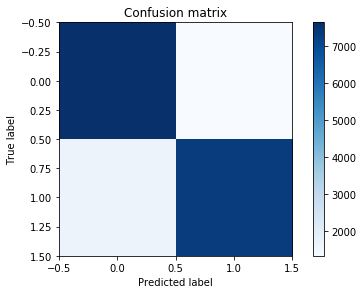

In [19]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.85      0.84      8983
        True       0.85      0.81      0.83      9017

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



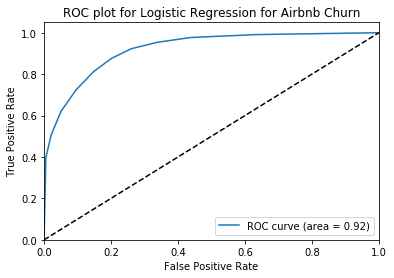

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot for Logistic Regression for Airbnb Churn')
plt.legend(loc="lower right")
plt.show()

In [22]:
def plot_roc(y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC plot for Logistic Regression for Airbnb Churn')
    plt.legend(loc="lower right")
    plt.show()

# Feature Engineering and Normalization

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer

In [24]:
features.head()

,host_is_superhost,price,room_type,accommodates,review_scores_cleanliness,review_scores_location,host_identity_verified,host_response_time,host_response_rate,host_has_profile_pic,availability_365,calculated_host_listings_count,calendar_updated,minimum_nights,number_of_reviews,reviews_per_month,days_since_last_review
30143,f,22.0,Shared room,1,9.0,9.0,t,within a few hours,100.0,t,308.0,17.0,a week ago,1,8,1.86,5.0
14401,f,60.0,Private room,1,10.0,10.0,f,within a day,57.0,t,330.0,1.0,a week ago,5,1,0.12,246.0
8028,f,100.0,Private room,4,9.0,8.0,t,within an hour,100.0,t,77.0,7.0,3 weeks ago,1,19,0.83,234.0
8110,f,115.0,Entire home/apt,2,0.0,0.0,f,a few days or more,0.0,t,0.0,1.0,7 months ago,1,0,0.00,3650.0
16586,f,110.0,Entire home/apt,3,10.0,10.0,f,within a day,50.0,t,0.0,1.0,5 months ago,2,7,1.15,81.0


In [25]:
drop_columns = ['host_response_time', 
                'calendar_updated',
                'days_since_last_review']

categorical_columns = ['host_is_superhost', 'room_type', 'host_identity_verified', 'host_has_profile_pic']

In [26]:
features_drop = features.drop(drop_columns, axis=1)

In [27]:
features_drop.head()

,host_is_superhost,price,room_type,accommodates,review_scores_cleanliness,review_scores_location,host_identity_verified,host_response_rate,host_has_profile_pic,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,reviews_per_month
30143,f,22.0,Shared room,1,9.0,9.0,t,100.0,t,308.0,17.0,1,8,1.86
14401,f,60.0,Private room,1,10.0,10.0,f,57.0,t,330.0,1.0,5,1,0.12
8028,f,100.0,Private room,4,9.0,8.0,t,100.0,t,77.0,7.0,1,19,0.83
8110,f,115.0,Entire home/apt,2,0.0,0.0,f,0.0,t,0.0,1.0,1,0,0.00
16586,f,110.0,Entire home/apt,3,10.0,10.0,f,50.0,t,0.0,1.0,2,7,1.15


In [28]:
transformer = make_column_transformer((OneHotEncoder(), categorical_columns), remainder=StandardScaler(), sparse_threshold=0)

In [29]:
transformer.fit_transform(features.drop(drop_columns, axis=1))

array([[ 1.  ,  0.  ,  0.  , ..., -0.2 , -0.11,  0.92],
       [ 1.  ,  0.  ,  0.  , ...,  0.16, -0.44, -0.59],
       [ 1.  ,  0.  ,  0.  , ..., -0.2 ,  0.42,  0.03],
       ...,
       [ 1.  ,  0.  ,  0.  , ..., -0.2 ,  2.63,  3.88],
       [ 1.  ,  0.  ,  1.  , ..., -0.02,  2.59,  2.6 ],
       [ 1.  ,  0.  ,  0.  , ..., -0.11, -0.44,  0.17]])

In [30]:
clf = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression(penalty='l1'))])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features.drop(drop_columns, axis=1), labels, test_size=0.2)

In [32]:
# fit model to training data
clf.fit(X_train, y_train)

# make predictions
predictions = clf.predict(X_test)

# evaluate model
accuracy = (predictions == y_test).sum() / len(y_test)
print(accuracy)

/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7188333333333333


Confusion matrix
[[4950 1056]
 [2318 3676]]


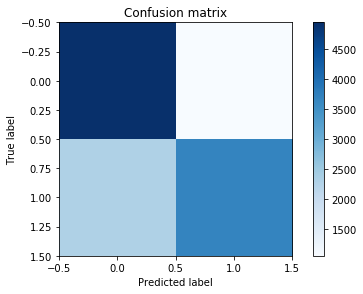

In [33]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

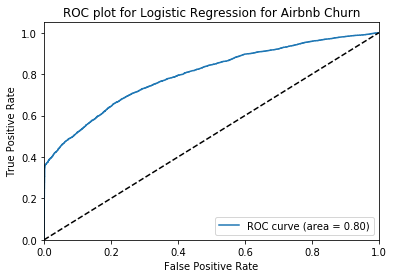

In [34]:
plot_roc(y_test, y_score)

### Original Unscaled Features

In [35]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.2)

# create model (estimator) object
clf = LogisticRegression(penalty='l1')

# fit model to training data
clf.fit(X_train, y_train)

# make predictions
predictions = clf.predict(X_test)

# evaluate model
accuracy = (predictions == y_test).sum() / len(y_test)
print(accuracy)

/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7335833333333334


Confusion matrix, without normalization
[[4984 1048]
 [2149 3819]]


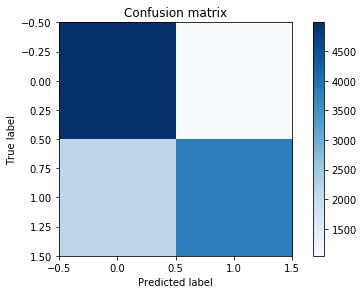

In [36]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

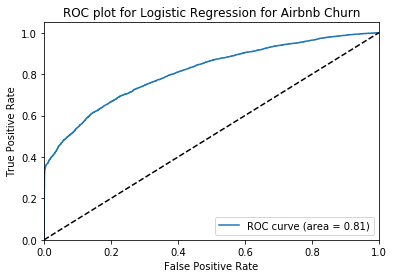

In [37]:
plot_roc(y_test, y_score)

# Model Selection and Hyperparameter Optimization

In [38]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.2)

In [39]:
# See also https://scikit-learn.org/stable/modules/grid_search.html

scores = np.zeros((2, 8))
penalties = ['l1', 'l2']
regularization = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

for i, penalty in enumerate(penalties):
    for j, C in enumerate(regularization):
        clf = LogisticRegression(penalty=penalty, C=C, solver='liblinear')

        scores[i, j] = cross_val_score(clf, X_train, y_train, cv=5).mean()

/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jonathandinu/anaconda3/envs/debugging

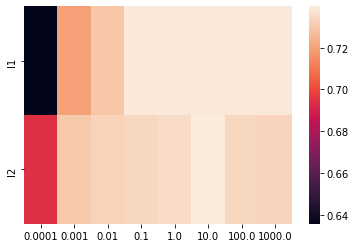

In [40]:
sns.heatmap(scores, xticklabels=regularization, yticklabels=penalties)

In [41]:
# Prefer L1 for sparsity constraints
scores[0].argmax()

# Create model with best performing hyperparameters
clf = LogisticRegression(penalty='l1', C=regularization[3])

# Fit on all of your (training) data
clf.fit(X_train, y_train)

# Evaluate on Holdout set
print(clf.score(X_test, y_test))

/Users/jonathandinu/anaconda3/envs/debugging-data/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7386666666666667
